In [0]:
#!/usr/bin/env python 3.7

**Universidad Internacional de La Rioja (UNIR) **

** Escuela de Ingeniería **

** Máster Universitario en Inteligencia Artificial **

## Comparativa de algoritmos de recuperación de información de especificaciones escritas en lenguaje natural

**Trabajo Fin de Máster**

**Presentado por:** Ñáñez Gómez, José Francisco

**Fecha:** 2018-12-1

**Lenguaje:** Python

**Versión:** 3.7


**Faltantes**



## Información:

Componente que:

Permite visualizar los diferentes resultados de los algoritmos, para interpretar los valores resultantes de las métricas seleccionadas para realizar las mediciones.  Obtiene la información de la carpeta de [/result/]; pero utiliza un conjunto de carpetas con el fin de compilar información [/compile/] y almacenar del análisis de correlación [/correlation/], los gráficos son presentados en pantalla directamente. El script es: TFM_JFNG_Component_5_Data_Visualization_V2.

## Descripción:



## Paso 1. Instalación de depedencias

In [0]:
!pip install pandas


In [0]:
!pip install pandas --upgrade

In [0]:
#!pip install pandas-profiling
!pip install pandas-profiling[notebook,html]

In [0]:
!pip install pandas_profiling --upgrade


## Paso 2. Importación de Librerías

In [0]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_profiling as pp
from sklearn import preprocessing
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from google.colab import drive


### Paso 2.1 Configuración de ruta de montaje para escritura o para 

In [0]:
#Montaje del drive
drive.mount('/content/gdrive', force_remount=True)

#Path para la lectura/escritura de los archivos
path = '/content/gdrive/My Drive/Colab Notebooks/TFM_JFNG_V3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Paso 3. Declaración de funciones

### Paso 3.1. Pasos

Normalización:
*    Normalizar los datos de cada algoritmo

Gráficos de algoritmos:


*   Por cada algoritmo cuantas busquedas se realizarón con entrega de información y cuales sin entrega de información. Gráfico de barras: 

*   Gráfica de lineas por cada algoritmo para presentar la tendencia: 

*   Resumén


### Paso 3.1. Carga de la información

In [0]:
#Directorio donde sera almacenado los resultados de los diferentes algoritmos
file_compile = 'compile/'
name = "df_result_20200412.csv"
df_result_clean_time = pd.read_csv(path + file_compile +name)
df_result_clean_time = df_result_clean_time.loc[:, ~df_result_clean_time.columns.str.contains('^Unnamed')]

df_result_clean_time.describe()

IndexTextBody         cosine  ...    SearchCount  TextBodyCount
count  615386.000000  613414.000000  ...  615386.000000  615386.000000
mean      116.437184       0.003824  ...       2.657119     286.893932
std       106.818511       0.012656  ...       1.021010     141.712011
min         0.000000       0.000000  ...       1.000000     128.000000
25%        26.000000       0.000000  ...       2.000000     152.000000
50%        80.000000       0.000000  ...       3.000000     346.000000
75%       189.000000       0.000000  ...       3.000000     390.000000
max       388.000000       0.408248  ...       8.000000     788.000000

[8 rows x 17 columns]

In [0]:
df_result_time = pd.read_csv(path + "compile/df_result_time_20200412.csv")
df_result_time = df_result_time.loc[:, ~df_result_time.columns.str.contains('^Unnamed')]

df_result_time.describe()


time-cosine      time-dice  ...     time-ngram   time-overlap
count  613414.000000  614400.000000  ...  613414.000000  613414.000000
mean        0.046946       0.044939  ...       0.053092       0.046491
std         0.184465       0.169858  ...       0.206960       0.170468
min         0.000165       0.000148  ...       0.000169       0.000158
25%         0.000265       0.000242  ...       0.000268       0.000258
50%         0.001198       0.001037  ...       0.001161       0.001065
75%         0.015657       0.014703  ...       0.019306       0.016520
max         3.595512       3.285876  ...       3.647744       2.562337

[8 rows x 7 columns]

In [0]:
df_result_values = pd.read_csv(path + "compile/df_result_values_20200412.csv")
df_result_values = df_result_values.loc[:, ~df_result_values.columns.str.contains('^Unnamed')]

df_result_values.describe()

cosine           dice  ...          ngram        overlap
count  613414.000000  614400.000000  ...  613414.000000  613414.000000
mean        0.003824       0.000757  ...       0.000027       0.053298
std         0.012656       0.003287  ...       0.000417       0.156647
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.000000  ...       0.000000       0.000000
75%         0.000000       0.000000  ...       0.000000       0.000000
max         0.408248       0.400000  ...       0.017699       1.000000

[8 rows x 7 columns]

### Paso 3.2. Actualización de datos para valores perdidos

In [0]:
print ( df_result_clean_time.isnull().sum() )

File                  0
IndexTextBody         0
Title                 0
URL                   0
cosine             1972
dice                986
euclidean         33696
jaccard            1972
manhattan         34628
ngram              1972
overlap            1972
time-cosine        1972
time-dice           986
time-euclidean    33696
time-jaccard       1972
time-manhattan    34628
time-ngram         1972
time-overlap       1972
Search                0
SearchCount           0
TextBodyCount         0
dtype: int64


In [0]:
df_result = df_result_clean_time

df_result["cosine"].fillna(0, inplace = True) 
df_result["time-cosine"].fillna(0, inplace = True) 
df_result["dice"].fillna(0, inplace = True) 
df_result["time-dice"].fillna(0, inplace = True) 
df_result["jaccard"].fillna(0, inplace = True) 
df_result["time-jaccard"].fillna(0, inplace = True) 
df_result["ngram"].fillna(0, inplace = True) 
df_result["time-ngram"].fillna(0, inplace = True) 
df_result["overlap"].fillna(0, inplace = True) 
df_result["time-overlap"].fillna(0, inplace = True) 


In [0]:
print ( df_result.isnull().sum() )

File                  0
IndexTextBody         0
Title                 0
URL                   0
cosine                0
dice                  0
euclidean         33696
jaccard               0
manhattan         34628
ngram                 0
overlap               0
time-cosine           0
time-dice             0
time-euclidean    33696
time-jaccard          0
time-manhattan    34628
time-ngram            0
time-overlap          0
Search                0
SearchCount           0
TextBodyCount         0
dtype: int64


In [0]:
maximo = df_result.euclidean.max()
tiempo = df_result["time-euclidean"][ df_result.euclidean.argmax() ]

df_result["euclidean"].fillna(maximo, inplace = True) 
df_result["time-euclidean"].fillna(tiempo, inplace = True)

In [0]:
print ( df_result.isnull().sum() )

File                  0
IndexTextBody         0
Title                 0
URL                   0
cosine                0
dice                  0
euclidean             0
jaccard               0
manhattan         34628
ngram                 0
overlap               0
time-cosine           0
time-dice             0
time-euclidean        0
time-jaccard          0
time-manhattan    34628
time-ngram            0
time-overlap          0
Search                0
SearchCount           0
TextBodyCount         0
dtype: int64


In [0]:
maximo = df_result.manhattan.max()
tiempo = df_result["time-manhattan"][ df_result.manhattan.argmax() ]

df_result["manhattan"].fillna(maximo, inplace = True) 
df_result["time-manhattan"].fillna(tiempo, inplace = True)

In [0]:
print ( df_result.isnull().sum() )

File              0
IndexTextBody     0
Title             0
URL               0
cosine            0
dice              0
euclidean         0
jaccard           0
manhattan         0
ngram             0
overlap           0
time-cosine       0
time-dice         0
time-euclidean    0
time-jaccard      0
time-manhattan    0
time-ngram        0
time-overlap      0
Search            0
SearchCount       0
TextBodyCount     0
dtype: int64


### Paso 3.5. Normalización de data

In [0]:
def normalize(df, feature_name):

    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = abs((df[feature_name] - min_value) / (max_value - min_value))
       
    return result

## Paso 4. Analisis de datos

### Paso 4.1. Coseno : Analisis de distribución de resultado por rango de puntajes 


In [0]:
df_result_cosine = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'cosine', 'time-cosine',	'Search', 'SearchCount', 'TextBodyCount']].copy()

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_cosine)


Output hidden; open in https://colab.research.google.com to view.

#### 4.1.1. Analisis de distribución de resultado por rango de puntajes 

In [0]:
ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_cosine_group = df_result_cosine.groupby(pd.cut(df_result_cosine.cosine, ranges)).count()
df_result_cosine_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
cosine                                    ...                                    
(0.0, 0.1]   74343          74343  74343  ...   74343        74343          74343
(0.1, 0.15]    414            414    414  ...     414          414            414
(0.15, 0.2]     13             13     13  ...      13           13             13
(0.2, 0.25]      0              0      0  ...       0            0              0
(0.25, 0.3]      0              0      0  ...       0            0              0
(0.3, 0.35]      0              0      0  ...       0            0              0
(0.35, 0.4]      0              0      0  ...       0            0              0
(0.4, 0.45]      1              1      1  ...       1            1              1
(0.45, 0.5]      0              0      0  ...       0            0              0
(0.5, 0.55]      0              0      0  ...       0            0              0
(0.55, 0.6]      0              0      0  ...       0            0              0
(0.6, 0.65]      0              0      0  ...       0            0              0
(0.65, 0.7]      0              0      0  ...       0            0              0
(0.7, 0.75]      0              0      0  ...       0            0              0
(0.75, 0.8]      0              0      0  ...       0            0              0
(0.8, 0.85]      0              0      0  ...       0            0              0
(0.85, 0.9]      0              0      0  ...       0            0              0
(0.9, 0.95]      0              0      0  ...       0            0              0
(0.95, 1.0]      0              0      0  ...       0            0              0

[19 rows x 9 columns]

In [0]:
df_result_cosine_sentences = df_result_cosine.loc[(df_result_cosine['cosine'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_cosine_sentences_group = df_result_cosine_sentences.groupby(pd.cut(df_result_cosine_sentences.TextBodyCount, ranges)).count()
df_result_cosine_sentences_group


File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     119073         119073  ...       119073         119073
(150, 200]     152753         152753  ...       152753         152753
(200, 250]       1091           1091  ...         1091           1091
(250, 300]          0              0  ...            0              0
(300, 350]      15819          15819  ...        15819          15819
(350, 400]     129137         129137  ...       129137         129137
(400, 450]      57308          57308  ...        57308          57308
(450, 500]      32218          32218  ...        32218          32218
(500, 550]      22875          22875  ...        22875          22875
(550, 600]       7111           7111  ...         7111           7111
(600, 650]        399            399  ...          399            399
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       2831           2831  ...         2831           2831
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
df_result_cosine_sentences = df_result_cosine.loc[(df_result_cosine['cosine'] > 0) & (df_result_cosine['cosine'] <= 1)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_cosine_sentences_group = df_result_cosine_sentences.groupby(pd.cut(df_result_cosine_sentences.TextBodyCount, ranges)).count()
df_result_cosine_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                               ...                                    
(0, 50]            0              0      0  ...       0            0              0
(50, 100]          0              0      0  ...       0            0              0
(100, 150]     15111          15111  15111  ...   15111        15111          15111
(150, 200]     18262          18262  18262  ...   18262        18262          18262
(200, 250]       157            157    157  ...     157          157            157
(250, 300]         0              0      0  ...       0            0              0
(300, 350]      1656           1656   1656  ...    1656         1656           1656
(350, 400]     21273          21273  21273  ...   21273        21273          21273
(400, 450]      9473           9473   9473  ...    9473         9473           9473
(450, 500]      4605           4605   4605  ...    4605         4605           4605
(500, 550]      2715           2715   2715  ...    2715         2715           2715
(550, 600]      1003           1003   1003  ...    1003         1003           1003
(600, 650]       225            225    225  ...     225          225            225
(650, 700]         0              0      0  ...       0            0              0
(700, 750]         0              0      0  ...       0            0              0
(750, 800]       291            291    291  ...     291          291            291
(800, 850]         0              0      0  ...       0            0              0
(850, 900]         0              0      0  ...       0            0              0
(900, 950]         0              0      0  ...       0            0              0
(950, 1000]        0              0      0  ...       0            0              0

[20 rows x 9 columns]

#### 4.1.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_cosine_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_cosine_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]

df_result_cosine_conteo_busquedas

Rango    1    2    3    4    5    6    7    8    9   10
0       0-50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     50-100  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    100-150  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    150-200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    200-250  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5    250-300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6    300-350  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7    350-400  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8    400-450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9    450-500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10   500-550  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
11   550-600  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12   600-650  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
13   650-700  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14   700-750  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
15   750-800  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
16   800-850  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
17   850-900  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
18   900-950  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
19  950-1000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [0]:
df_result_cosine_sentences_mayores = df_result_cosine.loc[(df_result_cosine['cosine'] > 0) & (df_result_cosine['cosine'] <= 1)]

top = len(df_result_cosine_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_cosine_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_cosine_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_cosine_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_cosine_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_cosine_conteo_busquedas

Rango       1       2       3       4  ...      6      7     8    9   10
0       0-50     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
1     50-100     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
2    100-150   737.0  5995.0  5589.0  2023.0  ...  145.0  116.0  41.0  0.0  0.0
3    150-200   970.0  7025.0  6908.0  2402.0  ...  181.0  126.0  37.0  0.0  0.0
4    200-250     6.0    66.0    57.0    19.0  ...    2.0    1.0   1.0  0.0  0.0
5    250-300     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
6    300-350    96.0   670.0   561.0   247.0  ...   16.0   14.0   9.0  0.0  0.0
7    350-400  1036.0  8178.0  7993.0  3015.0  ...  223.0  173.0  52.0  0.0  0.0
8    400-450   456.0  3676.0  3565.0  1314.0  ...   99.0   71.0  20.0  0.0  0.0
9    450-500   255.0  1742.0  1807.0   578.0  ...   37.0   31.0   5.0  0.0  0.0
10   500-550   172.0  1051.0  1003.0   364.0  ...   23.0   19.0   8.0  0.0  0.0
11   550-600    69.0   398.0   358.0   123.0  ...    9.0    9.0   3.0  0.0  0.0
12   600-650    18.0    92.0    80.0    25.0  ...    2.0    2.0   1.0  0.0  0.0
13   650-700     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
14   700-750     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
15   750-800    20.0   110.0   102.0    43.0  ...    3.0    2.0   2.0  0.0  0.0
16   800-850     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
17   850-900     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
18   900-950     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
19  950-1000     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0

[20 rows x 11 columns]

#### 4.1.4. Tiempo por escalafon de cantidad de palabras por especificación de api

In [0]:
df_result_cosine_sentences = df_result_cosine.loc[(df_result_cosine['cosine'] > 0) & (df_result_cosine['cosine'] <= 1)]
df_result_cosine_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_cosine_time_group["mean"] = df_result_cosine_sentences.groupby(pd.cut(df_result_cosine_sentences.TextBodyCount, ranges))["time-cosine"].mean()
df_result_cosine_time_group["max"] = df_result_cosine_sentences.groupby(pd.cut(df_result_cosine_sentences.TextBodyCount, ranges))["time-cosine"].max()
df_result_cosine_time_group["min"] = df_result_cosine_sentences.groupby(pd.cut(df_result_cosine_sentences.TextBodyCount, ranges))["time-cosine"].min()
df_result_cosine_time_group



mean       max       min
TextBodyCount                              
(0, 50]             NaN       NaN       NaN
(50, 100]           NaN       NaN       NaN
(100, 150]     0.225678  3.595512  0.000316
(150, 200]     0.102690  3.384092  0.000389
(200, 250]     0.004294  0.148527  0.001104
(250, 300]          NaN       NaN       NaN
(300, 350]     0.229292  1.393064  0.000389
(350, 400]     0.214062  3.254804  0.000277
(400, 450]     0.202270  3.081361  0.000395
(450, 500]     0.049186  0.444004  0.000405
(500, 550]     0.103786  0.855332  0.000403
(550, 600]     0.050806  0.352348  0.000394
(600, 650]     0.043863  0.233556  0.003878
(650, 700]          NaN       NaN       NaN
(700, 750]          NaN       NaN       NaN
(750, 800]     0.060236  0.264638  0.004573
(800, 850]          NaN       NaN       NaN
(850, 900]          NaN       NaN       NaN
(900, 950]          NaN       NaN       NaN
(950, 1000]         NaN       NaN       NaN

### Paso 4.2. Dice: Analisis de distribución de resultado por rango de puntajes 


In [0]:
df_result_dice = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'dice', 'time-dice',	'Search', 'SearchCount', 'TextBodyCount']].copy()

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_dice)

Output hidden; open in https://colab.research.google.com to view.

##### 4.2.1. Análisis de distribución de resultados por rango de puntajes

In [0]:

ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_dice_group = df_result_dice.groupby(pd.cut(df_result_dice.dice, ranges)).count()
df_result_dice_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
dice                                      ...                                    
(0.0, 0.1]   72380          72380  72380  ...   72380        72380          72380
(0.1, 0.15]     13             13     13  ...      13           13             13
(0.15, 0.2]      0              0      0  ...       0            0              0
(0.2, 0.25]      0              0      0  ...       0            0              0
(0.25, 0.3]      0              0      0  ...       0            0              0
(0.3, 0.35]      0              0      0  ...       0            0              0
(0.35, 0.4]      5              5      5  ...       5            5              5
(0.4, 0.45]      0              0      0  ...       0            0              0
(0.45, 0.5]      0              0      0  ...       0            0              0
(0.5, 0.55]      0              0      0  ...       0            0              0
(0.55, 0.6]      0              0      0  ...       0            0              0
(0.6, 0.65]      0              0      0  ...       0            0              0
(0.65, 0.7]      0              0      0  ...       0            0              0
(0.7, 0.75]      0              0      0  ...       0            0              0
(0.75, 0.8]      0              0      0  ...       0            0              0
(0.8, 0.85]      0              0      0  ...       0            0              0
(0.85, 0.9]      0              0      0  ...       0            0              0
(0.9, 0.95]      0              0      0  ...       0            0              0
(0.95, 1.0]      0              0      0  ...       0            0              0

[19 rows x 9 columns]

##### 4.2.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's

In [0]:
df_result_dice_sentences = df_result_dice.loc[(df_result_dice['dice'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_dice_sentences_group = df_result_dice_sentences.groupby(pd.cut(df_result_dice_sentences.TextBodyCount, ranges)).count()
df_result_dice_sentences_group

File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     119773         119773  ...       119773         119773
(150, 200]     153661         153661  ...       153661         153661
(200, 250]       1109           1109  ...         1109           1109
(250, 300]          0              0  ...            0              0
(300, 350]      15786          15786  ...        15786          15786
(350, 400]     129653         129653  ...       129653         129653
(400, 450]      57427          57427  ...        57427          57427
(450, 500]      32334          32334  ...        32334          32334
(500, 550]      22874          22874  ...        22874          22874
(550, 600]       7115           7115  ...         7115           7115
(600, 650]        405            405  ...          405            405
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       2851           2851  ...         2851           2851
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
df_result_dice_sentences = df_result_dice.loc[(df_result_dice['dice'] > 0.35) & (df_result_dice['dice'] <= 0.4)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_dice_sentences_group = df_result_dice_sentences.groupby(pd.cut(df_result_dice_sentences.TextBodyCount, ranges)).count()
df_result_dice_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                              ...                                    
(0, 50]           0              0      0  ...       0            0              0
(50, 100]         0              0      0  ...       0            0              0
(100, 150]        5              5      5  ...       5            5              5
(150, 200]        0              0      0  ...       0            0              0
(200, 250]        0              0      0  ...       0            0              0
(250, 300]        0              0      0  ...       0            0              0
(300, 350]        0              0      0  ...       0            0              0
(350, 400]        0              0      0  ...       0            0              0
(400, 450]        0              0      0  ...       0            0              0
(450, 500]        0              0      0  ...       0            0              0
(500, 550]        0              0      0  ...       0            0              0
(550, 600]        0              0      0  ...       0            0              0
(600, 650]        0              0      0  ...       0            0              0
(650, 700]        0              0      0  ...       0            0              0
(700, 750]        0              0      0  ...       0            0              0
(750, 800]        0              0      0  ...       0            0              0
(800, 850]        0              0      0  ...       0            0              0
(850, 900]        0              0      0  ...       0            0              0
(900, 950]        0              0      0  ...       0            0              0
(950, 1000]       0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_dice_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_dice_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]

df_result_dice_conteo_busquedas

Rango    1    2    3    4    5    6    7    8    9   10
0       0-50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     50-100  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    100-150  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    150-200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    200-250  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5    250-300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6    300-350  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7    350-400  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8    400-450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9    450-500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10   500-550  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
11   550-600  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12   600-650  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
13   650-700  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14   700-750  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
15   750-800  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
16   800-850  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
17   850-900  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
18   900-950  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
19  950-1000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [0]:
df_result_dice_sentences_mayores = df_result_dice.loc[(df_result_dice['dice'] > 0) & (df_result_dice['dice'] <= 1)]

top = len(df_result_dice_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_dice_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_dice_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_dice_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_dice_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_dice_conteo_busquedas

Rango       1       2       3       4  ...      6      7     8    9   10
0       0-50     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
1     50-100     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
2    100-150   737.0  5631.0  5442.0  1963.0  ...  227.0  104.0  39.0  0.0  0.0
3    150-200   942.0  6582.0  6668.0  2346.0  ...  268.0  137.0  37.0  0.0  0.0
4    200-250     5.0    55.0    55.0    15.0  ...    4.0    1.0   1.0  0.0  0.0
5    250-300     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
6    300-350    97.0   674.0   606.0   242.0  ...   25.0   12.0   9.0  0.0  0.0
7    350-400  1041.0  7925.0  7976.0  2895.0  ...  335.0  150.0  47.0  0.0  0.0
8    400-450   438.0  3587.0  3615.0  1303.0  ...  150.0   65.0  20.0  0.0  0.0
9    450-500   247.0  1719.0  1794.0   549.0  ...   44.0   29.0   5.0  0.0  0.0
10   500-550   175.0  1056.0  1014.0   357.0  ...   33.0   17.0   7.0  0.0  0.0
11   550-600    67.0   387.0   366.0   132.0  ...   12.0    9.0   3.0  0.0  0.0
12   600-650    20.0    81.0    80.0    27.0  ...    4.0    3.0   1.0  0.0  0.0
13   650-700     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
14   700-750     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
15   750-800    19.0    99.0    96.0    43.0  ...    5.0    1.0   2.0  0.0  0.0
16   800-850     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
17   850-900     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
18   900-950     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
19  950-1000     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0

[20 rows x 11 columns]

#### 4.2.3. Tiempo por escalafon de cantidad de palabras por especificación de api

In [0]:
df_result_dice_sentences = df_result_dice.loc[(df_result_dice['dice'] > 0) & (df_result_dice['dice'] <= 1)]
df_result_dice_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_dice_time_group["mean"] = df_result_dice_sentences.groupby(pd.cut(df_result_dice_sentences.TextBodyCount, ranges))["time-dice"].mean()
df_result_dice_time_group["max"] = df_result_dice_sentences.groupby(pd.cut(df_result_dice_sentences.TextBodyCount, ranges))["time-dice"].max()
df_result_dice_time_group["min"] = df_result_dice_sentences.groupby(pd.cut(df_result_dice_sentences.TextBodyCount, ranges))["time-dice"].min()
df_result_dice_time_group

### Paso 4.3. Jaccard: Analisis de distribución de resultado por rango de puntajes 


In [0]:
df_result_jaccard = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'jaccard', 'time-jaccard',	'Search', 'SearchCount', 'TextBodyCount']].copy()

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_jaccard)

Output hidden; open in https://colab.research.google.com to view.

##### 4.3.1. Análisis de distribución de resultados por rango de puntaje

In [0]:

ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_jaccard_group = df_result_jaccard.groupby(pd.cut(df_result_jaccard.jaccard, ranges)).count()
df_result_jaccard_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
jaccard                                   ...                                    
(0.0, 0.1]   74466          74466  74466  ...   74466        74466          74466
(0.1, 0.15]      9              9      9  ...       9            9              9
(0.15, 0.2]      0              0      0  ...       0            0              0
(0.2, 0.25]      1              1      1  ...       1            1              1
(0.25, 0.3]      0              0      0  ...       0            0              0
(0.3, 0.35]      0              0      0  ...       0            0              0
(0.35, 0.4]      0              0      0  ...       0            0              0
(0.4, 0.45]      0              0      0  ...       0            0              0
(0.45, 0.5]      0              0      0  ...       0            0              0
(0.5, 0.55]      0              0      0  ...       0            0              0
(0.55, 0.6]      0              0      0  ...       0            0              0
(0.6, 0.65]      0              0      0  ...       0            0              0
(0.65, 0.7]      0              0      0  ...       0            0              0
(0.7, 0.75]      0              0      0  ...       0            0              0
(0.75, 0.8]      0              0      0  ...       0            0              0
(0.8, 0.85]      0              0      0  ...       0            0              0
(0.85, 0.9]      0              0      0  ...       0            0              0
(0.9, 0.95]      0              0      0  ...       0            0              0
(0.95, 1.0]      0              0      0  ...       0            0              0

[19 rows x 9 columns]

##### 4.3.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's



In [0]:
df_result_jaccard_sentences = df_result_jaccard.loc[(df_result_jaccard['jaccard'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_jaccard_sentences_group = df_result_jaccard_sentences.groupby(pd.cut(df_result_jaccard_sentences.TextBodyCount, ranges)).count()
df_result_jaccard_sentences_group

File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     119313         119313  ...       119313         119313
(150, 200]     153187         153187  ...       153187         153187
(200, 250]       1083           1083  ...         1083           1083
(250, 300]          0              0  ...            0              0
(300, 350]      15704          15704  ...        15704          15704
(350, 400]     129137         129137  ...       129137         129137
(400, 450]      57120          57120  ...        57120          57120
(450, 500]      32291          32291  ...        32291          32291
(500, 550]      22788          22788  ...        22788          22788
(550, 600]       7090           7090  ...         7090           7090
(600, 650]        381            381  ...          381            381
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       2816           2816  ...         2816           2816
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
df_result_jaccard_sentences = df_result_jaccard.loc[(df_result_jaccard['jaccard'] > 0.2) & (df_result_jaccard['jaccard'] <= 0.25)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_jaccard_sentences_group = df_result_jaccard_sentences.groupby(pd.cut(df_result_jaccard_sentences.TextBodyCount, ranges)).count()
df_result_jaccard_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                              ...                                    
(0, 50]           0              0      0  ...       0            0              0
(50, 100]         0              0      0  ...       0            0              0
(100, 150]        1              1      1  ...       1            1              1
(150, 200]        0              0      0  ...       0            0              0
(200, 250]        0              0      0  ...       0            0              0
(250, 300]        0              0      0  ...       0            0              0
(300, 350]        0              0      0  ...       0            0              0
(350, 400]        0              0      0  ...       0            0              0
(400, 450]        0              0      0  ...       0            0              0
(450, 500]        0              0      0  ...       0            0              0
(500, 550]        0              0      0  ...       0            0              0
(550, 600]        0              0      0  ...       0            0              0
(600, 650]        0              0      0  ...       0            0              0
(650, 700]        0              0      0  ...       0            0              0
(700, 750]        0              0      0  ...       0            0              0
(750, 800]        0              0      0  ...       0            0              0
(800, 850]        0              0      0  ...       0            0              0
(850, 900]        0              0      0  ...       0            0              0
(900, 950]        0              0      0  ...       0            0              0
(950, 1000]       0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_jaccard_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_jaccard_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]



df_result_jaccard_sentences_mayores = df_result_jaccard.loc[(df_result_jaccard['jaccard'] > 0) & (df_result_jaccard['jaccard'] <= 1)]

top = len(df_result_jaccard_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_jaccard_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_jaccard_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_jaccard_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_jaccard_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_jaccard_conteo_busquedas

Rango       1       2       3       4  ...      6      7     8    9   10
0       0-50     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
1     50-100     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
2    100-150   707.0  5741.0  5543.0  2122.0  ...  210.0  115.0  44.0  0.0  0.0
3    150-200   947.0  6731.0  6775.0  2439.0  ...  254.0  144.0  39.0  0.0  0.0
4    200-250     6.0    64.0    64.0    19.0  ...    4.0    2.0   1.0  0.0  0.0
5    250-300     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
6    300-350    99.0   687.0   630.0   264.0  ...   26.0   12.0   9.0  0.0  0.0
7    350-400  1012.0  8082.0  8097.0  3033.0  ...  315.0  152.0  56.0  0.0  0.0
8    400-450   434.0  3681.0  3692.0  1383.0  ...  135.0   70.0  21.0  0.0  0.0
9    450-500   265.0  1726.0  1791.0   555.0  ...   44.0   29.0   5.0  0.0  0.0
10   500-550   170.0  1078.0  1046.0   377.0  ...   31.0   17.0   8.0  0.0  0.0
11   550-600    67.0   399.0   372.0   131.0  ...   12.0   10.0   3.0  0.0  0.0
12   600-650    21.0    95.0    86.0    28.0  ...    4.0    3.0   1.0  0.0  0.0
13   650-700     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
14   700-750     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
15   750-800    22.0   107.0   115.0    45.0  ...    4.0    3.0   2.0  0.0  0.0
16   800-850     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
17   850-900     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
18   900-950     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0
19  950-1000     0.0     0.0     0.0     0.0  ...    0.0    0.0   0.0  0.0  0.0

[20 rows x 11 columns]

#### 4.3.3. Tiempo por escalafon de cantidad de palabras por especificación de api

In [0]:
df_result_jaccard_sentences = df_result_jaccard.loc[(df_result_jaccard['jaccard'] > 0) & (df_result_jaccard['jaccard'] <= 1)]
df_result_jaccard_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_jaccard_time_group["mean"] = df_result_jaccard_sentences.groupby(pd.cut(df_result_jaccard_sentences.TextBodyCount, ranges))["time-jaccard"].mean()
df_result_jaccard_time_group["max"] = df_result_jaccard_sentences.groupby(pd.cut(df_result_jaccard_sentences.TextBodyCount, ranges))["time-jaccard"].max()
df_result_jaccard_time_group["min"] = df_result_jaccard_sentences.groupby(pd.cut(df_result_jaccard_sentences.TextBodyCount, ranges))["time-jaccard"].min()
df_result_jaccard_time_group



### Paso 4.4. Ngram: Analisis de distribución de resultado por rango de puntajes 




In [0]:

df_result_ngram = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'ngram', 'time-ngram',  'Search', 'SearchCount', 'TextBodyCount']].copy()





In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_ngram)

Output hidden; open in https://colab.research.google.com to view.

##### 4.4.1. Análisis de distribución de resultados por rango de puntaje



In [0]:
ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_ngram_group = df_result_ngram.groupby(pd.cut(df_result_ngram.ngram, ranges)).count()
df_result_ngram_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
ngram                                    ...                                    
(0.0, 0.1]   4344           4344   4344  ...    4344         4344           4344
(0.1, 0.15]     0              0      0  ...       0            0              0
(0.15, 0.2]     0              0      0  ...       0            0              0
(0.2, 0.25]     0              0      0  ...       0            0              0
(0.25, 0.3]     0              0      0  ...       0            0              0
(0.3, 0.35]     0              0      0  ...       0            0              0
(0.35, 0.4]     0              0      0  ...       0            0              0
(0.4, 0.45]     0              0      0  ...       0            0              0
(0.45, 0.5]     0              0      0  ...       0            0              0
(0.5, 0.55]     0              0      0  ...       0            0              0
(0.55, 0.6]     0              0      0  ...       0            0              0
(0.6, 0.65]     0              0      0  ...       0            0              0
(0.65, 0.7]     0              0      0  ...       0            0              0
(0.7, 0.75]     0              0      0  ...       0            0              0
(0.75, 0.8]     0              0      0  ...       0            0              0
(0.8, 0.85]     0              0      0  ...       0            0              0
(0.85, 0.9]     0              0      0  ...       0            0              0
(0.9, 0.95]     0              0      0  ...       0            0              0
(0.95, 1.0]     0              0      0  ...       0            0              0

[19 rows x 9 columns]

##### 4.4.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's


In [0]:
df_result_ngram_sentences = df_result_ngram.loc[(df_result_ngram['ngram'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_ngram_sentences_group = df_result_ngram_sentences.groupby(pd.cut(df_result_ngram_sentences.TextBodyCount, ranges)).count()
df_result_ngram_sentences_group

File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     133291         133291  ...       133291         133291
(150, 200]     169995         169995  ...       169995         169995
(200, 250]       1244           1244  ...         1244           1244
(250, 300]          0              0  ...            0              0
(300, 350]      17346          17346  ...        17346          17346
(350, 400]     149252         149252  ...       149252         149252
(400, 450]      66221          66221  ...        66221          66221
(450, 500]      36598          36598  ...        36598          36598
(500, 550]      25423          25423  ...        25423          25423
(550, 600]       8040           8040  ...         8040           8040
(600, 650]        592            592  ...          592            592
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       3040           3040  ...         3040           3040
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
df_result_ngram_sentences = df_result_ngram.loc[(df_result_ngram['ngram'] > 0) & (df_result_ngram['ngram'] <= 0.1)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_ngram_sentences_group = df_result_ngram_sentences.groupby(pd.cut(df_result_ngram_sentences.TextBodyCount, ranges)).count()
df_result_ngram_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                              ...                                    
(0, 50]           0              0      0  ...       0            0              0
(50, 100]         0              0      0  ...       0            0              0
(100, 150]      893            893    893  ...     893          893            893
(150, 200]     1020           1020   1020  ...    1020         1020           1020
(200, 250]        4              4      4  ...       4            4              4
(250, 300]        0              0      0  ...       0            0              0
(300, 350]      129            129    129  ...     129          129            129
(350, 400]     1158           1158   1158  ...    1158         1158           1158
(400, 450]      560            560    560  ...     560          560            560
(450, 500]      225            225    225  ...     225          225            225
(500, 550]      167            167    167  ...     167          167            167
(550, 600]       74             74     74  ...      74           74             74
(600, 650]       32             32     32  ...      32           32             32
(650, 700]        0              0      0  ...       0            0              0
(700, 750]        0              0      0  ...       0            0              0
(750, 800]       82             82     82  ...      82           82             82
(800, 850]        0              0      0  ...       0            0              0
(850, 900]        0              0      0  ...       0            0              0
(900, 950]        0              0      0  ...       0            0              0
(950, 1000]       0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_ngram_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_ngram_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]



df_result_ngram_sentences_mayores = df_result_ngram.loc[(df_result_ngram['ngram'] > 0) & (df_result_ngram['ngram'] <= 0.5)]

top = len(df_result_ngram_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_ngram_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_ngram_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_ngram_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_ngram_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_ngram_conteo_busquedas


Rango     1      2      3      4     5     6     7    8    9   10
0       0-50   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
1     50-100   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
2    100-150  26.0  339.0  271.0  203.0  21.0  24.0   8.0  1.0  0.0  0.0
3    150-200  42.0  379.0  335.0  197.0  36.0  21.0  10.0  0.0  0.0  0.0
4    200-250   0.0    1.0    1.0    2.0   0.0   0.0   0.0  0.0  0.0  0.0
5    250-300   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
6    300-350   5.0   49.0   38.0   31.0   3.0   3.0   0.0  0.0  0.0  0.0
7    350-400  44.0  407.0  392.0  248.0  28.0  28.0  11.0  0.0  0.0  0.0
8    400-450  16.0  186.0  190.0  125.0  19.0  18.0   6.0  0.0  0.0  0.0
9    450-500  26.0   79.0   78.0   27.0  10.0   2.0   3.0  0.0  0.0  0.0
10   500-550   1.0   64.0   50.0   42.0   5.0   4.0   1.0  0.0  0.0  0.0
11   550-600   0.0   28.0   22.0   18.0   3.0   2.0   1.0  0.0  0.0  0.0
12   600-650   0.0   12.0   10.0    8.0   1.0   1.0   0.0  0.0  0.0  0.0
13   650-700   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
14   700-750   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
15   750-800   0.0   32.0   22.0   22.0   2.0   2.0   2.0  0.0  0.0  0.0
16   800-850   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
17   850-900   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
18   900-950   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0
19  950-1000   0.0    0.0    0.0    0.0   0.0   0.0   0.0  0.0  0.0  0.0

#### 4.4.4. Tiempo por escalafon de cantidad de palabras por especificación de api


In [0]:
df_result_ngram_sentences = df_result_ngram.loc[(df_result_ngram['ngram'] > 0) & (df_result_ngram['ngram'] <= 1)]
df_result_ngram_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_ngram_time_group["mean"] = df_result_ngram_sentences.groupby(pd.cut(df_result_ngram_sentences.TextBodyCount, ranges))["time-ngram"].mean()
df_result_ngram_time_group["max"] = df_result_ngram_sentences.groupby(pd.cut(df_result_ngram_sentences.TextBodyCount, ranges))["time-ngram"].max()
df_result_ngram_time_group["min"] = df_result_ngram_sentences.groupby(pd.cut(df_result_ngram_sentences.TextBodyCount, ranges))["time-ngram"].min()
df_result_ngram_time_group

### 4.5. Overlap: Analisis de distribución de resultado por rango de puntajes 


In [0]:
df_result_overlap = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'overlap', 'time-overlap',  'Search', 'SearchCount', 'TextBodyCount']].copy()


In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_overlap)


Output hidden; open in https://colab.research.google.com to view.

##### 4.5.1. Análisis de distribución de resultados por rango de puntaje


In [0]:
ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_overlap_group = df_result_overlap.groupby(pd.cut(df_result_overlap.overlap, ranges)).count()
df_result_overlap_group


File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
overlap                                   ...                                    
(0.0, 0.1]       0              0      0  ...       0            0              0
(0.1, 0.15]     29             29     29  ...      29           29             29
(0.15, 0.2]   2331           2331   2331  ...    2331         2331           2331
(0.2, 0.25]  10311          10311  10311  ...   10311        10311          10311
(0.25, 0.3]     30             30     30  ...      30           30             30
(0.3, 0.35]  28465          28465  28465  ...   28465        28465          28465
(0.35, 0.4]    295            295    295  ...     295          295            295
(0.4, 0.45]     53             53     53  ...      53           53             53
(0.45, 0.5]  22570          22570  22570  ...   22570        22570          22570
(0.5, 0.55]      0              0      0  ...       0            0              0
(0.55, 0.6]    103            103    103  ...     103          103            103
(0.6, 0.65]      2              2      2  ...       2            2              2
(0.65, 0.7]   6120           6120   6120  ...    6120         6120           6120
(0.7, 0.75]    879            879    879  ...     879          879            879
(0.75, 0.8]     38             38     38  ...      38           38             38
(0.8, 0.85]     19             19     19  ...      19           19             19
(0.85, 0.9]      0              0      0  ...       0            0              0
(0.9, 0.95]      0              0      0  ...       0            0              0
(0.95, 1.0]   3918           3918   3918  ...    3918         3918           3918

[19 rows x 9 columns]

##### 4.5.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's




In [0]:
df_result_overlap_sentences = df_result_overlap.loc[(df_result_overlap['overlap'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_overlap_sentences_group = df_result_overlap_sentences.groupby(pd.cut(df_result_overlap_sentences.TextBodyCount, ranges)).count()
df_result_overlap_sentences_group

File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     119103         119103  ...       119103         119103
(150, 200]     153039         153039  ...       153039         153039
(200, 250]       1083           1083  ...         1083           1083
(250, 300]          0              0  ...            0              0
(300, 350]      15699          15699  ...        15699          15699
(350, 400]     128814         128814  ...       128814         128814
(400, 450]      57113          57113  ...        57113          57113
(450, 500]      32338          32338  ...        32338          32338
(500, 550]      22752          22752  ...        22752          22752
(550, 600]       7074           7074  ...         7074           7074
(600, 650]        389            389  ...          389            389
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       2819           2819  ...         2819           2819
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
df_result_overlap_sentences = df_result_overlap.loc[(df_result_overlap['overlap'] > 0.95) & (df_result_overlap['overlap'] <= 1)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_overlap_sentences_group = df_result_overlap_sentences.groupby(pd.cut(df_result_overlap_sentences.TextBodyCount, ranges)).count()
df_result_overlap_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                              ...                                    
(0, 50]           0              0      0  ...       0            0              0
(50, 100]         0              0      0  ...       0            0              0
(100, 150]      921            921    921  ...     921          921            921
(150, 200]      862            862    862  ...     862          862            862
(200, 250]        8              8      8  ...       8            8              8
(250, 300]        0              0      0  ...       0            0              0
(300, 350]      128            128    128  ...     128          128            128
(350, 400]     1102           1102   1102  ...    1102         1102           1102
(400, 450]      459            459    459  ...     459          459            459
(450, 500]      145            145    145  ...     145          145            145
(500, 550]      177            177    177  ...     177          177            177
(550, 600]       63             63     63  ...      63           63             63
(600, 650]       20             20     20  ...      20           20             20
(650, 700]        0              0      0  ...       0            0              0
(700, 750]        0              0      0  ...       0            0              0
(750, 800]       33             33     33  ...      33           33             33
(800, 850]        0              0      0  ...       0            0              0
(850, 900]        0              0      0  ...       0            0              0
(900, 950]        0              0      0  ...       0            0              0
(950, 1000]       0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_overlap_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_overlap_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]


In [0]:
df_result_overlap_sentences_mayores = df_result_overlap.loc[(df_result_overlap['overlap'] > 0.95) & (df_result_overlap['overlap'] <= 1)]

top = len(df_result_overlap_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_overlap_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_overlap_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_overlap_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_overlap_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_overlap_conteo_busquedas

Rango      1      2      3     4    5     6    7     8    9   10
0       0-50    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
1     50-100    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
2    100-150  202.0  323.0  246.0  86.0  9.0  12.0  3.0  40.0  0.0  0.0
3    150-200  235.0  274.0  236.0  63.0  5.0   8.0  4.0  37.0  0.0  0.0
4    200-250    1.0    2.0    3.0   1.0  0.0   0.0  0.0   1.0  0.0  0.0
5    250-300    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
6    300-350   34.0   38.0   33.0  12.0  1.0   1.0  0.0   9.0  0.0  0.0
7    350-400  267.0  375.0  290.0  95.0  7.0  15.0  6.0  47.0  0.0  0.0
8    400-450  110.0  168.0  111.0  43.0  3.0   5.0  2.0  17.0  0.0  0.0
9    450-500   34.0   49.0   37.0  18.0  1.0   1.0  0.0   5.0  0.0  0.0
10   500-550   40.0   60.0   52.0  14.0  1.0   2.0  0.0   8.0  0.0  0.0
11   550-600   18.0   17.0   18.0   7.0  0.0   0.0  0.0   3.0  0.0  0.0
12   600-650    6.0    5.0    5.0   3.0  0.0   0.0  0.0   1.0  0.0  0.0
13   650-700    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
14   700-750    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
15   750-800   12.0    8.0    9.0   2.0  0.0   0.0  0.0   2.0  0.0  0.0
16   800-850    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
17   850-900    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
18   900-950    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0
19  950-1000    0.0    0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0

#### 4.5.3. Tiempo por escalafon de cantidad de palabras por especificación de api


In [0]:
df_result_overlap_sentences = df_result_overlap.loc[(df_result_overlap['overlap'] > 0) & (df_result_overlap['overlap'] <= 1)]
df_result_overlap_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_overlap_time_group["mean"] = df_result_overlap_sentences.groupby(pd.cut(df_result_overlap_sentences.TextBodyCount, ranges))["time-overlap"].mean()
df_result_overlap_time_group["max"] = df_result_overlap_sentences.groupby(pd.cut(df_result_overlap_sentences.TextBodyCount, ranges))["time-overlap"].max()
df_result_overlap_time_group["min"] = df_result_overlap_sentences.groupby(pd.cut(df_result_overlap_sentences.TextBodyCount, ranges))["time-overlap"].min()
df_result_overlap_time_group


### Paso 4.6 Euclidean: Analisis de distribución de resultado por rango de puntajes 



In [0]:
df_result_euclidean = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'euclidean', 'time-euclidean',  'Search', 'SearchCount', 'TextBodyCount']].copy()
df_result_euclidean

File  ...  TextBodyCount
0       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          150.0
1       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          382.0
2       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          148.0
3       api.ocbc.com/OCBC API Store - CONNECT2OCBC - t...  ...          152.0
4       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          384.0
...                                                   ...  ...            ...
615381  barclays/Confirmation of Funds API | Documenta...  ...          431.0
615382  barclays/Consent API | Documentation | Barclay...  ...          163.0
615383  barclays/Barclaycard DE Confirmation of Funds ...  ...          359.0
615384  barclays/Branch Locator API | Documentation | ...  ...          390.0
615385  barclays/Barclaycard DE Consent API | Document...  ...          448.0

[615386 rows x 9 columns]

In [0]:
df_result_euclidean = normalize(df_result_euclidean, 'euclidean')
df_result_euclidean

File  ...  TextBodyCount
0       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          150.0
1       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          382.0
2       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          148.0
3       api.ocbc.com/OCBC API Store - CONNECT2OCBC - t...  ...          152.0
4       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          384.0
...                                                   ...  ...            ...
615381  barclays/Confirmation of Funds API | Documenta...  ...          431.0
615382  barclays/Consent API | Documentation | Barclay...  ...          163.0
615383  barclays/Barclaycard DE Confirmation of Funds ...  ...          359.0
615384  barclays/Branch Locator API | Documentation | ...  ...          390.0
615385  barclays/Barclaycard DE Consent API | Document...  ...          448.0

[615386 rows x 9 columns]

##### 4.6.1. Análisis de distribución de resultados por rango de puntaje


In [0]:
ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_euclidean_group = df_result_euclidean.groupby(pd.cut(df_result_euclidean.euclidean, ranges)).count()
df_result_euclidean_group


File  IndexTextBody   Title  ...  Search  SearchCount  TextBodyCount
euclidean                                   ...                                    
(0.0, 0.1]   518666         518666  518666  ...  518666       518666         518666
(0.1, 0.15]    1872           1872    1872  ...    1872         1872           1872
(0.15, 0.2]     624            624     624  ...     624          624            624
(0.2, 0.25]       0              0       0  ...       0            0              0
(0.25, 0.3]     624            624     624  ...     624          624            624
(0.3, 0.35]       0              0       0  ...       0            0              0
(0.35, 0.4]       0              0       0  ...       0            0              0
(0.4, 0.45]       0              0       0  ...       0            0              0
(0.45, 0.5]       0              0       0  ...       0            0              0
(0.5, 0.55]       0              0       0  ...       0            0              0
(0.55, 0.6]       0              0       0  ...       0            0              0
(0.6, 0.65]       0              0       0  ...       0            0              0
(0.65, 0.7]       0              0       0  ...       0            0              0
(0.7, 0.75]       0              0       0  ...       0            0              0
(0.75, 0.8]       0              0       0  ...       0            0              0
(0.8, 0.85]       0              0       0  ...       0            0              0
(0.85, 0.9]       0              0       0  ...       0            0              0
(0.9, 0.95]       0              0       0  ...       0            0              0
(0.95, 1.0]   41808          41808   41808  ...   41808        41808          41808

[19 rows x 9 columns]

##### 4.6.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's


In [0]:
df_result_euclidean_sentences = df_result_euclidean.loc[(df_result_euclidean['euclidean'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_euclidean_sentences_group = df_result_euclidean_sentences.groupby(pd.cut(df_result_euclidean_sentences.TextBodyCount, ranges)).count()
df_result_euclidean_sentences_group


File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                               ...                                    
(0, 50]            0              0      0  ...       0            0              0
(50, 100]          0              0      0  ...       0            0              0
(100, 150]     13104          13104  13104  ...   13104        13104          13104
(150, 200]     16848          16848  16848  ...   16848        16848          16848
(200, 250]         0              0      0  ...       0            0              0
(250, 300]         0              0      0  ...       0            0              0
(300, 350]      1248           1248   1248  ...    1248         1248           1248
(350, 400]      7488           7488   7488  ...    7488         7488           7488
(400, 450]      7488           7488   7488  ...    7488         7488           7488
(450, 500]      3744           3744   3744  ...    3744         3744           3744
(500, 550]       624            624    624  ...     624          624            624
(550, 600]      1248           1248   1248  ...    1248         1248           1248
(600, 650]         0              0      0  ...       0            0              0
(650, 700]         0              0      0  ...       0            0              0
(700, 750]         0              0      0  ...       0            0              0
(750, 800]         0              0      0  ...       0            0              0
(800, 850]         0              0      0  ...       0            0              0
(850, 900]         0              0      0  ...       0            0              0
(900, 950]         0              0      0  ...       0            0              0
(950, 1000]        0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
df_result_euclidean_sentences = df_result_euclidean.loc[(df_result_euclidean['euclidean'] > 0) & (df_result_euclidean['euclidean'] <= 1)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_euclidean_sentences_group = df_result_euclidean_sentences.groupby(pd.cut(df_result_euclidean_sentences.TextBodyCount, ranges)).count()
df_result_euclidean_sentences_group


File  IndexTextBody  ...  SearchCount  TextBodyCount
TextBodyCount                         ...                            
(0, 50]             0              0  ...            0              0
(50, 100]           0              0  ...            0              0
(100, 150]     121080         121080  ...       121080         121080
(150, 200]     154167         154167  ...       154167         154167
(200, 250]       1248           1248  ...         1248           1248
(250, 300]          0              0  ...            0              0
(300, 350]      16227          16227  ...        16227          16227
(350, 400]     142922         142922  ...       142922         142922
(400, 450]      59293          59293  ...        59293          59293
(450, 500]      33079          33079  ...        33079          33079
(500, 550]      24966          24966  ...        24966          24966
(550, 600]       6866           6866  ...         6866           6866
(600, 650]        624            624  ...          624            624
(650, 700]          0              0  ...            0              0
(700, 750]          0              0  ...            0              0
(750, 800]       3122           3122  ...         3122           3122
(800, 850]          0              0  ...            0              0
(850, 900]          0              0  ...            0              0
(900, 950]          0              0  ...            0              0
(950, 1000]         0              0  ...            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_euclidean_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_euclidean_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]



df_result_euclidean_sentences_mayores = df_result_euclidean.loc[(df_result_euclidean['euclidean'] > 0) & (df_result_euclidean['euclidean'] <= 1)]

top = len(df_result_euclidean_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_euclidean_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_euclidean_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_euclidean_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_euclidean_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_euclidean_conteo_busquedas


Rango        1        2        3  ...      7      8    9   10
0       0-50      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
1     50-100      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
2    100-150   9118.0  50828.0  41734.0  ...  776.0  194.0  0.0  0.0
3    150-200  11609.0  64714.0  53144.0  ...  988.0  247.0  0.0  0.0
4    200-250     94.0    524.0    430.0  ...    8.0    2.0  0.0  0.0
5    250-300      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
6    300-350   1222.0   6812.0   5593.0  ...  104.0   26.0  0.0  0.0
7    350-400  10763.0  59998.0  49261.0  ...  916.0  229.0  0.0  0.0
8    400-450   4465.0  24890.0  20438.0  ...  380.0   95.0  0.0  0.0
9    450-500   2491.0  13886.0  11402.0  ...  212.0   53.0  0.0  0.0
10   500-550   1880.0  10480.0   8606.0  ...  160.0   40.0  0.0  0.0
11   550-600    517.0   2882.0   2367.0  ...   44.0   11.0  0.0  0.0
12   600-650     47.0    262.0    215.0  ...    4.0    1.0  0.0  0.0
13   650-700      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
14   700-750      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
15   750-800    235.0   1310.0   1077.0  ...   20.0    5.0  0.0  0.0
16   800-850      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
17   850-900      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
18   900-950      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
19  950-1000      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0

[20 rows x 11 columns]

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_euclidean)

Output hidden; open in https://colab.research.google.com to view.

#### 4.6.3. Tiempo por escalafon de cantidad de palabras por especificación de api


In [0]:
df_result_euclidean_sentences = df_result_euclidean.loc[(df_result_euclidean['euclidean'] > 0) & (df_result_euclidean['euclidean'] <= 1)]
df_result_euclidean_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_euclidean_time_group["mean"] = df_result_euclidean_sentences.groupby(pd.cut(df_result_euclidean_sentences.TextBodyCount, ranges))["time-euclidean"].mean()
df_result_euclidean_time_group["max"] = df_result_euclidean_sentences.groupby(pd.cut(df_result_euclidean_sentences.TextBodyCount, ranges))["time-euclidean"].max()
df_result_euclidean_time_group["min"] = df_result_euclidean_sentences.groupby(pd.cut(df_result_euclidean_sentences.TextBodyCount, ranges))["time-euclidean"].min()
df_result_euclidean_time_group

### Paso 4.7. Manhattan: Analisis de distribución de resultado por rango de puntajes 



In [0]:
df_result_manhattan = df_result[['File', 'IndexTextBody', 'Title', 'URL', 'manhattan', 'time-manhattan',  'Search', 'SearchCount', 'TextBodyCount']].copy()


In [0]:
df_result_manhattan = normalize(df_result_manhattan, 'manhattan')
df_result_manhattan

File  ...  TextBodyCount
0       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          150.0
1       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          382.0
2       api.ocbc.com/OCBC API Store - CONNECT2OCBC - r...  ...          148.0
3       api.ocbc.com/OCBC API Store - CONNECT2OCBC - t...  ...          152.0
4       api.ocbc.com/OCBC API Store - CONNECT2OCBC - A...  ...          384.0
...                                                   ...  ...            ...
615381  barclays/Confirmation of Funds API | Documenta...  ...          431.0
615382  barclays/Consent API | Documentation | Barclay...  ...          163.0
615383  barclays/Barclaycard DE Confirmation of Funds ...  ...          359.0
615384  barclays/Branch Locator API | Documentation | ...  ...          390.0
615385  barclays/Barclaycard DE Consent API | Document...  ...          448.0

[615386 rows x 9 columns]

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_result_manhattan)


##### 4.7.1. Análisis de distribución de resultados por rango de puntaje


In [0]:
ranges = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.950,1]
df_result_manhattan_group = df_result_manhattan.groupby(pd.cut(df_result_manhattan.manhattan, ranges)).count()
df_result_manhattan_group


File  IndexTextBody   Title  ...  Search  SearchCount  TextBodyCount
manhattan                                   ...                                    
(0.0, 0.1]   510359         510359  510359  ...  510359       510359         510359
(0.1, 0.15]    4984           4984    4984  ...    4984         4984           4984
(0.15, 0.2]    2492           2492    2492  ...    2492         2492           2492
(0.2, 0.25]    1869           1869    1869  ...    1869         1869           1869
(0.25, 0.3]       0              0       0  ...       0            0              0
(0.3, 0.35]       0              0       0  ...       0            0              0
(0.35, 0.4]     623            623     623  ...     623          623            623
(0.4, 0.45]       0              0       0  ...       0            0              0
(0.45, 0.5]     623            623     623  ...     623          623            623
(0.5, 0.55]       0              0       0  ...       0            0              0
(0.55, 0.6]       0              0       0  ...       0            0              0
(0.6, 0.65]       0              0       0  ...       0            0              0
(0.65, 0.7]       0              0       0  ...       0            0              0
(0.7, 0.75]       0              0       0  ...       0            0              0
(0.75, 0.8]    6853           6853    6853  ...    6853         6853           6853
(0.8, 0.85]     623            623     623  ...     623          623            623
(0.85, 0.9]       0              0       0  ...       0            0              0
(0.9, 0.95]       0              0       0  ...       0            0              0
(0.95, 1.0]   35251          35251   35251  ...   35251        35251          35251

[19 rows x 9 columns]

##### 4.7.2. Cantidad de respuestas por rango de palabras de búsquedas versus rango de palabras de especificaciones de API's


In [0]:
df_result_manhattan_sentences = df_result_manhattan.loc[(df_result_manhattan['manhattan'] == 0)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_manhattan_sentences_group = df_result_manhattan_sentences.groupby(pd.cut(df_result_manhattan_sentences.TextBodyCount, ranges)).count()
df_result_manhattan_sentences_group


File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                               ...                                    
(0, 50]            0              0      0  ...       0            0              0
(50, 100]          0              0      0  ...       0            0              0
(100, 150]     13083          13083  13083  ...   13083        13083          13083
(150, 200]     16821          16821  16821  ...   16821        16821          16821
(200, 250]         0              0      0  ...       0            0              0
(250, 300]         0              0      0  ...       0            0              0
(300, 350]      1246           1246   1246  ...    1246         1246           1246
(350, 400]      7476           7476   7476  ...    7476         7476           7476
(400, 450]      7476           7476   7476  ...    7476         7476           7476
(450, 500]      3738           3738   3738  ...    3738         3738           3738
(500, 550]       623            623    623  ...     623          623            623
(550, 600]      1246           1246   1246  ...    1246         1246           1246
(600, 650]         0              0      0  ...       0            0              0
(650, 700]         0              0      0  ...       0            0              0
(700, 750]         0              0      0  ...       0            0              0
(750, 800]         0              0      0  ...       0            0              0
(800, 850]         0              0      0  ...       0            0              0
(850, 900]         0              0      0  ...       0            0              0
(900, 950]         0              0      0  ...       0            0              0
(950, 1000]        0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
df_result_manhattan_sentences = df_result_manhattan.loc[(df_result_manhattan['manhattan'] > 0.2) & (df_result_manhattan['manhattan'] <= 0.25)]

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_manhattan_sentences_group = df_result_manhattan_sentences.groupby(pd.cut(df_result_manhattan_sentences.TextBodyCount, ranges)).count()
df_result_manhattan_sentences_group

File  IndexTextBody  Title  ...  Search  SearchCount  TextBodyCount
TextBodyCount                              ...                                    
(0, 50]           0              0      0  ...       0            0              0
(50, 100]         0              0      0  ...       0            0              0
(100, 150]        0              0      0  ...       0            0              0
(150, 200]        0              0      0  ...       0            0              0
(200, 250]        0              0      0  ...       0            0              0
(250, 300]        0              0      0  ...       0            0              0
(300, 350]        0              0      0  ...       0            0              0
(350, 400]     1869           1869   1869  ...    1869         1869           1869
(400, 450]        0              0      0  ...       0            0              0
(450, 500]        0              0      0  ...       0            0              0
(500, 550]        0              0      0  ...       0            0              0
(550, 600]        0              0      0  ...       0            0              0
(600, 650]        0              0      0  ...       0            0              0
(650, 700]        0              0      0  ...       0            0              0
(700, 750]        0              0      0  ...       0            0              0
(750, 800]        0              0      0  ...       0            0              0
(800, 850]        0              0      0  ...       0            0              0
(850, 900]        0              0      0  ...       0            0              0
(900, 950]        0              0      0  ...       0            0              0
(950, 1000]       0              0      0  ...       0            0              0

[20 rows x 9 columns]

In [0]:
COLUMNS = ["Rango", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


a = np.zeros(shape=(20,11))

#create el data frame con ceros para todas las filas y columnas
df_result_manhattan_conteo_busquedas = pd.DataFrame(a, columns = COLUMNS )
df_result_manhattan_conteo_busquedas.Rango = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750", "750-800", "800-850", "850-900", "900-950", "950-1000"]



df_result_manhattan_sentences_mayores = df_result_manhattan.loc[(df_result_manhattan['manhattan'] > 0) & (df_result_manhattan['manhattan'] <= 1)]

top = len(df_result_manhattan_sentences_mayores)


for i in range(0, top):
  cantidad_palabras_pagina = int(df_result_manhattan_sentences_mayores.iloc[i]["TextBodyCount"])
  cantidad_palabras_busqueda = int(df_result_manhattan_sentences_mayores.iloc[i]["SearchCount"])
  base = 0
  alto = 50 
  salto = 50 

  for j in range (0,19):
      if cantidad_palabras_pagina > base and cantidad_palabras_pagina <= alto:
        value = int(df_result_manhattan_conteo_busquedas.iloc[j][str(cantidad_palabras_busqueda)])
        df_result_manhattan_conteo_busquedas.at[j, str(cantidad_palabras_busqueda)] = value + 1 
        j = 20
      base = alto
      alto = alto + salto


df_result_manhattan_conteo_busquedas


Rango        1        2        3  ...      7      8    9   10
0       0-50      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
1     50-100      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
2    100-150   9118.0  50849.0  41734.0  ...  776.0  194.0  0.0  0.0
3    150-200  11609.0  64741.0  53144.0  ...  988.0  247.0  0.0  0.0
4    200-250     94.0    524.0    430.0  ...    8.0    2.0  0.0  0.0
5    250-300      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
6    300-350   1222.0   6814.0   5593.0  ...  104.0   26.0  0.0  0.0
7    350-400  10763.0  60010.0  49261.0  ...  916.0  229.0  0.0  0.0
8    400-450   4465.0  24902.0  20438.0  ...  380.0   95.0  0.0  0.0
9    450-500   2491.0  13892.0  11402.0  ...  212.0   53.0  0.0  0.0
10   500-550   1880.0  10481.0   8606.0  ...  160.0   40.0  0.0  0.0
11   550-600    517.0   2884.0   2367.0  ...   44.0   11.0  0.0  0.0
12   600-650     47.0    262.0    215.0  ...    4.0    1.0  0.0  0.0
13   650-700      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
14   700-750      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
15   750-800    235.0   1310.0   1077.0  ...   20.0    5.0  0.0  0.0
16   800-850      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
17   850-900      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
18   900-950      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0
19  950-1000      0.0      0.0      0.0  ...    0.0    0.0  0.0  0.0

[20 rows x 11 columns]

#### 4.7.3. Tiempo por escalafon de cantidad de palabras por especificación de api


In [0]:
df_result_manhattan_sentences = df_result_manhattan.loc[(df_result_manhattan['manhattan'] > 0) & (df_result_manhattan['manhattan'] <= 1)]
df_result_manhattan_time_group = pd.DataFrame(columns=["mean", "max", "min"])

ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
df_result_manhattan_time_group["mean"] = df_result_manhattan_sentences.groupby(pd.cut(df_result_manhattan_sentences.TextBodyCount, ranges))["time-manhattan"].mean()
df_result_manhattan_time_group["max"] = df_result_manhattan_sentences.groupby(pd.cut(df_result_manhattan_sentences.TextBodyCount, ranges))["time-manhattan"].max()
df_result_manhattan_time_group["min"] = df_result_manhattan_sentences.groupby(pd.cut(df_result_manhattan_sentences.TextBodyCount, ranges))["time-manhattan"].min()
df_result_manhattan_time_group


### Paso 4.8. Análisis de las frases de búsqueda

### Paso 4.9. Análisis de las frases de búsqueda

In [0]:
#Directorio donde sera almacenado los resultados de los diferentes algoritmos
key_words = 'key_words/'
name = "df_key_words.csv"
df_key_words = pd.read_csv(path + key_words +name)
df_key_words.columns

Index(['Unnamed: 0', 'IndexSearch', 'Search', 'SearchCount'], dtype='object')

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_key_words)

### Paso 4.9. Análisis del data set construido de la especificaciones de las API's

In [0]:
data_preprocessing = 'data_preprocessing/'
name = "df_sentences.csv"
df_sentences = pd.read_csv(path + data_preprocessing +name)
df_sentences.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'level_0', 'index',
       'URL', 'Title', 'File', 'TextBody', 'IndexTextBody', 'TextBodyCount'],
      dtype='object')

In [0]:
import pandas as pd
import pandas_profiling as pp


pp.ProfileReport(df_sentences)

Output hidden; open in https://colab.research.google.com to view.

## PASO 5. Gráficos

### Paso 5.1. Creación de la matriz de correlación



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pearsoncorr = df_result.corr(method='pearson')
pearsoncorr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


cosine      dice  euclidean  ...  manhattan     ngram   overlap
cosine     1.000000  0.913308  -0.031958  ...   0.005857  0.049187  0.848776
dice       0.913308  1.000000   0.000216  ...   0.018308  0.038529  0.629887
euclidean -0.031958  0.000216   1.000000  ...   0.893690 -0.007250 -0.153847
jaccard    0.947979  0.988273  -0.012095  ...   0.013675  0.046299  0.700175
manhattan  0.005857  0.018308   0.893690  ...   1.000000 -0.006788 -0.098237
ngram      0.049187  0.038529  -0.007250  ...  -0.006788  1.000000  0.045349
overlap    0.848776  0.629887  -0.153847  ...  -0.098237  0.045349  1.000000

[7 rows x 7 columns]

In [0]:
df_temp = df_result.corr(method='pearson')
df_temp.to_csv(path + "correlation/" + "correlation.csv")

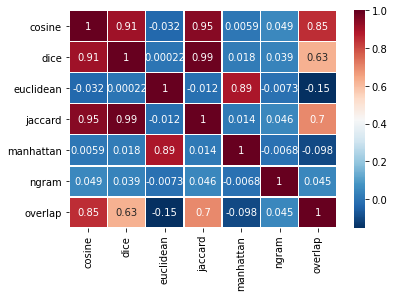

In [0]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Paso 5.2. Gráfica de correlación 

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_result_values_norm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
df_temp = df_result_values_norm.nlargest(10, ['cosine']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_cosine.csv")

df_temp = df_result_values_norm.nlargest(10, ['dice']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_dice.csv")

df_temp = df_result_values_norm.nlargest(10, ['euclidean']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_euclidean.csv")

df_temp = df_result_values_norm.nlargest(10, ['jaccard']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_jaccard.csv")

df_temp = df_result_values_norm.nlargest(10, ['manhattan']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_manhattan.csv")

df_temp = df_result_values_norm.nlargest(10, ['ngram']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_ngram.csv")

df_temp = df_result_values_norm.nlargest(10, ['overlap']) 
df_temp.to_csv(path + "correlation/" + "ordenamiento_overlap.csv")


### Paso 5.3. Creación de las listas para iniciar la visualización

In [0]:
#Cantidad de información recuperada
COLUMN_NAMES = ['cosine',	'dice',	'euclidean',	'jaccard',	'manhattan',	'ngram',	'overlap']
df_result_count = pd.DataFrame(columns=COLUMN_NAMES)
df_temp = pd.DataFrame()

list_temp_recovery = []
list_temp_no_recovery = []

list_temp_recovery_per = []
list_temp_no_recovery_per = []


y = df_result_values_norm.cosine.count()

for column in COLUMN_NAMES:
  x = np.count_nonzero( df_result_values_norm[[column]] )
                       
  list_temp_recovery.append( x )
  list_temp_no_recovery.append( y-x )

  list_temp_recovery_per.append( x/y*100 )
  list_temp_no_recovery_per.append( (y-x)/y*100 )


df_result_count.loc["recovery"] = list_temp_recovery
df_result_count.loc["no_recovery"] = list_temp_no_recovery


print( df_result_count.head(5) )

print( list_temp_recovery )


            cosine   dice euclidean jaccard manhattan  ngram overlap
recovery      1413   1413     36461    1413     36461     15    1413
no_recovery  35069  35069        21   35069        21  36467   35069
[1413, 1413, 36461, 1413, 36461, 15, 1413]


### Paso 5.4. Visualización de: Cantidad de especificaciones recuperadas y Cantidad de especificaciones recuperadas (en %)





In [0]:
import matplotlib.pyplot as plt
import numpy as np



def plot_bar_graphics(list_rects1 , list_rects2, COLUMN_NAMES, title, y_title):

  list_temp_recovery = list_rects1
  list_temp_no_recovery = list_rects2

  x = np.arange(len(COLUMN_NAMES))  # the label locations
  width = 0.3  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, list_temp_recovery, width, label='Recovery')
  rects2 = ax.bar(x + width/2, list_temp_no_recovery, width, label='No Recovery')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(y_title)
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(COLUMN_NAMES)
  ax.legend()


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)
  
  fig.set_size_inches(18.5, 10.5)
  
  plt.rcParams["figure.figsize"] = (20,3)
  plt.show()

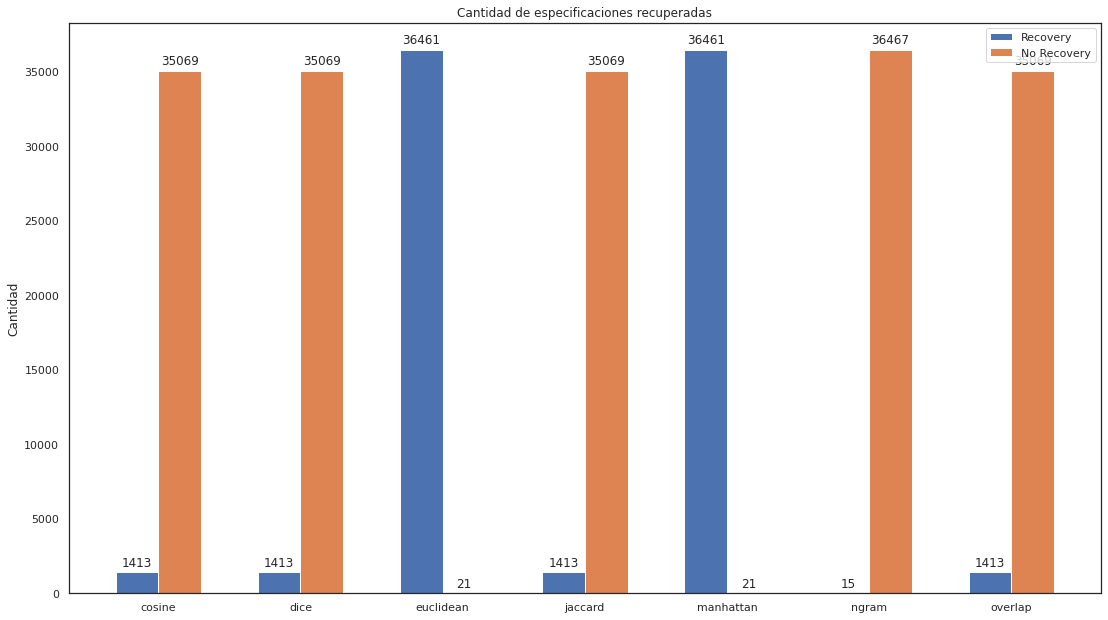

In [0]:

title = "Cantidad de especificaciones recuperadas"
plot_bar_graphics(list_temp_recovery , list_temp_no_recovery, COLUMN_NAMES, title, "Cantidad")


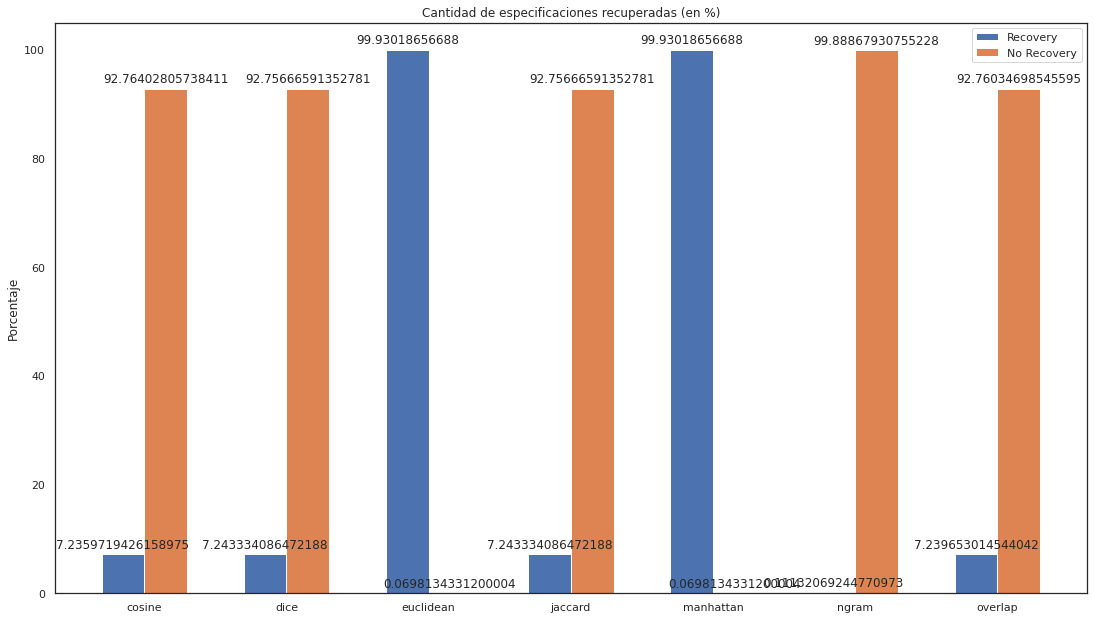

In [0]:

title = "Cantidad de especificaciones recuperadas (en %)"
plot_bar_graphics(list_temp_recovery_per , list_temp_no_recovery_per, COLUMN_NAMES, title, "Porcentaje")


Visualización

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [-3, -2, 4], 'b': [-2, 2, 5], 'c': [-1, 3, 7], 'd': [1, 4, 8]})
df.values

df.values.flatten()

sum(n < 0 for n in df.a.values.flatten())


2

In [0]:

def count_value_mayor_minor(value, COLUMN_NAMES):
  list_temp_minor = []
  list_temp_mayor = []

  y = df_result_values_norm.cosine.count()

  for column in COLUMN_NAMES:
    x = sum(n > value for n in df_result_values_norm[[column]].values.flatten())
    list_temp_minor.append( x )
    list_temp_mayor.append( y-x )

  return list_temp_minor, list_temp_mayor


### Paso 5.5. Visualización de: Cantidad de especificaciones encontradas y Cantidad de especificaciones NO encontradas

[35069, 35069, 21, 35069, 21, 36467, 35069]
[1413, 1413, 36461, 1413, 36461, 15, 1413]


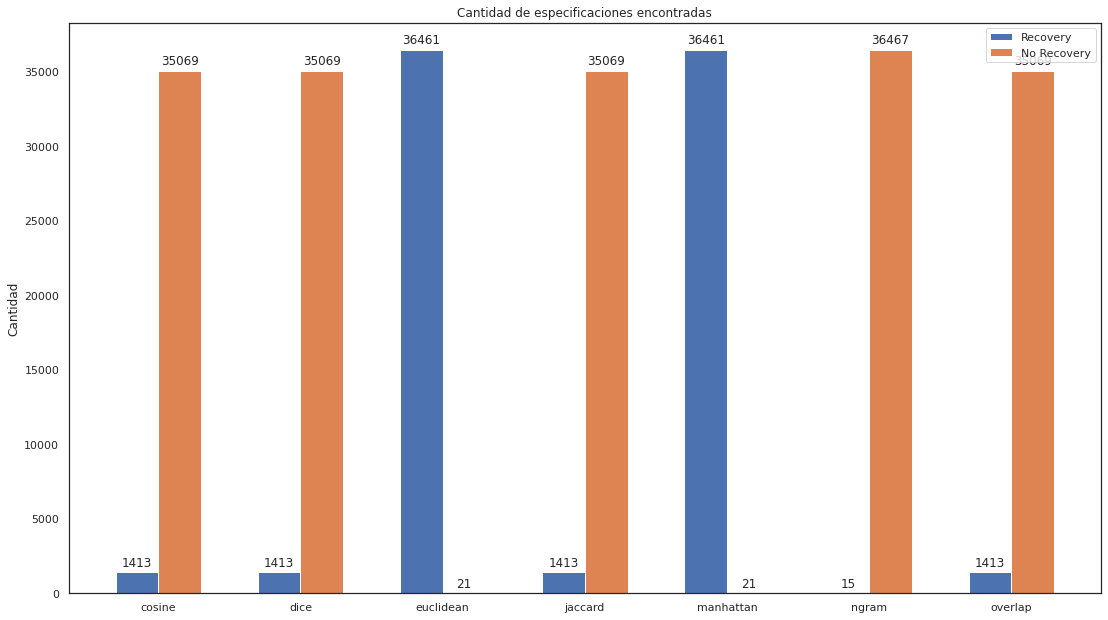

In [0]:
COLUMN_NAMES = ['cosine',	'dice',	'euclidean',	'jaccard',	'manhattan',	'ngram',	'overlap']
value = 0
list_temp_minor_0, list_temp_mayor_0 = count_value_mayor_minor(value, COLUMN_NAMES)

print( list_temp_mayor_0 )
print( list_temp_minor_0 )

title = "Cantidad de especificaciones encontradas"
plot_bar_graphics(list_temp_minor_0 , list_temp_mayor_0, COLUMN_NAMES, title, "Cantidad")


### Paso 5.6. Visualización de: Cantidad de especificaciones recuperadas con una similitud mayor a alfa (0.5, 0.8)

[36176, 36431, 592, 36394, 481, 36481, 35985]
[306, 51, 35890, 88, 36001, 1, 497]


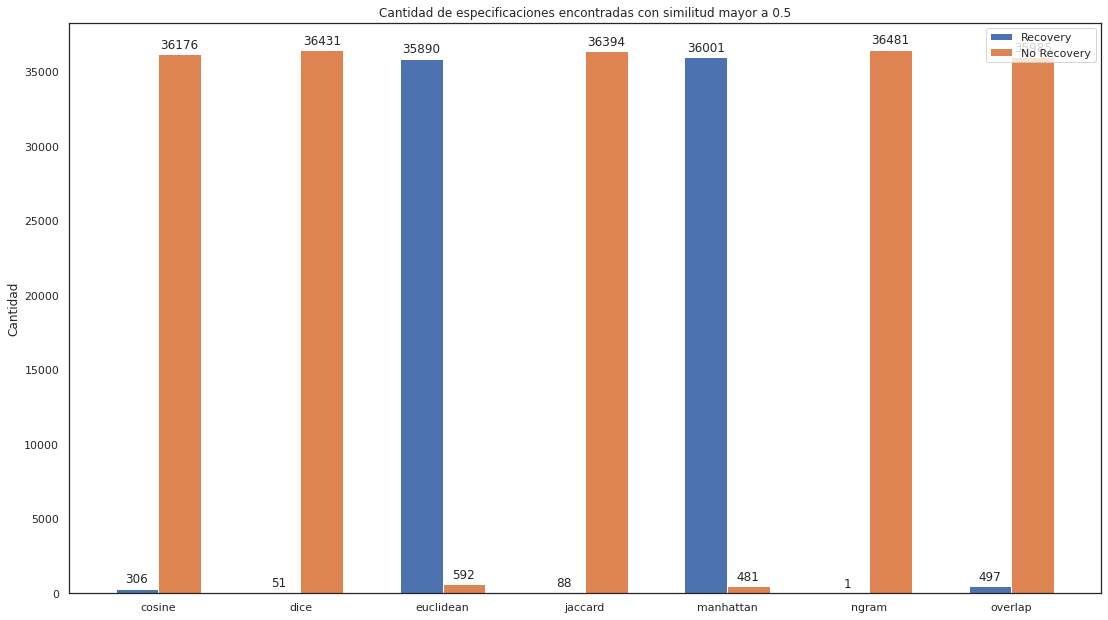

In [0]:
COLUMN_NAMES = ['cosine',	'dice',	'euclidean',	'jaccard',	'manhattan',	'ngram',	'overlap']
value = 0.5
list_temp_minor_0, list_temp_mayor_0 = count_value_mayor_minor(value, COLUMN_NAMES)

print( list_temp_mayor_0 )
print( list_temp_minor_0 )

title = "Cantidad de especificaciones encontradas con similitud mayor a 0.5"
plot_bar_graphics(list_temp_minor_0 , list_temp_mayor_0, COLUMN_NAMES, title, "Cantidad")


[36443, 36445, 9863, 36445, 851, 36481, 36002]
[39, 37, 26619, 37, 35631, 1, 480]


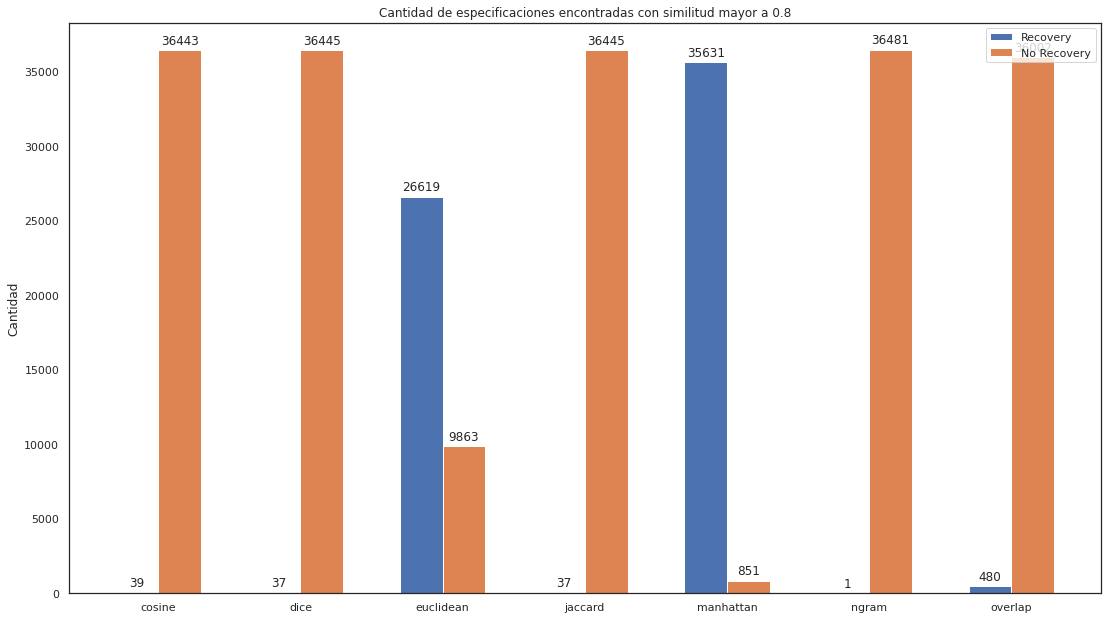

In [0]:
COLUMN_NAMES = ['cosine',	'dice',	'euclidean',	'jaccard',	'manhattan',	'ngram',	'overlap']
value = 0.85
list_temp_minor_0, list_temp_mayor_0 = count_value_mayor_minor(value, COLUMN_NAMES)

print( list_temp_mayor_0 )
print( list_temp_minor_0 )

title = "Cantidad de especificaciones encontradas con similitud mayor a 0.8"
plot_bar_graphics(list_temp_minor_0 , list_temp_mayor_0, COLUMN_NAMES, title, "Cantidad")